# TSA ARIMA model for World-wide Deaths cases prediction

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
%matplotlib inline

In [ ]:
df = pd.read_csv("covid_19_data.csv")

In [ ]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
156287,156288,11/15/2020,Zaporizhia Oblast,Ukraine,2020-11-16 05:25:57,18484.0,164.0,3021.0
156288,156289,11/15/2020,Zeeland,Netherlands,2020-11-16 05:25:57,5041.0,86.0,0.0
156289,156290,11/15/2020,Zhejiang,Mainland China,2020-11-16 05:25:57,1291.0,1.0,1279.0
156290,156291,11/15/2020,Zhytomyr Oblast,Ukraine,2020-11-16 05:25:57,22225.0,368.0,12266.0
156291,156292,11/15/2020,Zuid-Holland,Netherlands,2020-11-16 05:25:57,129188.0,2031.0,0.0


In [ ]:
dh = df.drop(['SNo', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Recovered'], axis=1)

In [ ]:
dh.tail()

,ObservationDate,Deaths
156287,11/15/2020,164.0
156288,11/15/2020,86.0
156289,11/15/2020,1.0
156290,11/15/2020,368.0
156291,11/15/2020,2031.0


In [ ]:
final = dh.groupby(['ObservationDate']).sum()

In [ ]:
final.head()

,Deaths
ObservationDate,
01/22/2020,17.0
01/23/2020,18.0
01/24/2020,26.0
01/25/2020,42.0
01/26/2020,56.0


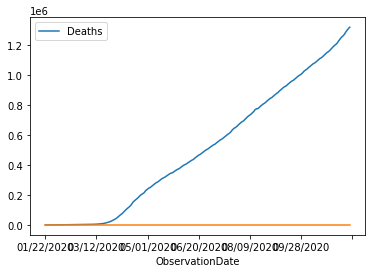

In [ ]:
final.plot()
final_logScale = np.log(final)  #taking log 
plt.plot(final_logScale)

In [ ]:
def test_stationarity(timeseries):  
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.xticks(rotation=45)
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:   Augmented Dickey–Fuller ADF
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Deaths'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

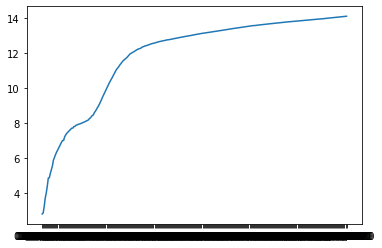

In [ ]:
indexedDataset_logScale = np.log(final)  #taking log 
plt.plot(indexedDataset_logScale)

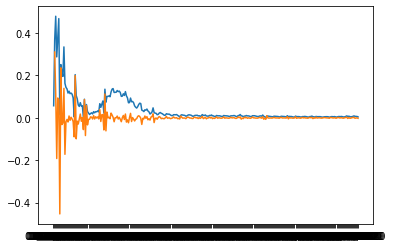

In [ ]:
#Differencing
datasetLogDiffShifting_1 = final_logScale - final_logScale.shift()
plt.plot(datasetLogDiffShifting_1)

datasetLogDiffShifting_2 = datasetLogDiffShifting_1 - datasetLogDiffShifting_1.shift()
plt.plot(datasetLogDiffShifting_2)

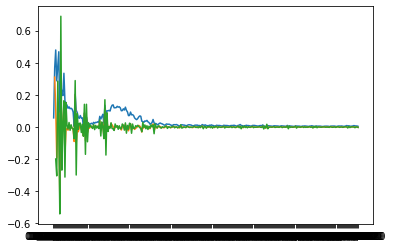

In [ ]:
example1 = indexedDataset_logScale.diff(1)
plt.plot(example1)
example2 = example1.diff(1)
plt.plot(example2)
example3 = example2.diff(1)
plt.plot(example3)

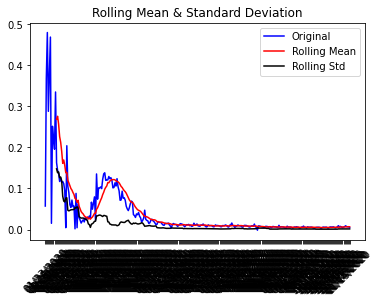

Results of Dickey Fuller Test:
Test Statistic                  -1.571244
p-value                          0.498021
#Lags Used                      16.000000
Number of Observations Used    281.000000
Critical Value (1%)             -3.453838
Critical Value (5%)             -2.871881
Critical Value (10%)            -2.572280
dtype: float64


In [ ]:
datasetLogDiffShifting_1.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting_1)

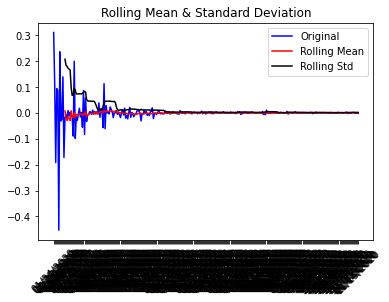

Results of Dickey Fuller Test:
Test Statistic                -6.981262e+00
p-value                        8.180761e-10
#Lags Used                     1.500000e+01
Number of Observations Used    2.810000e+02
Critical Value (1%)           -3.453838e+00
Critical Value (5%)           -2.871881e+00
Critical Value (10%)          -2.572280e+00
dtype: float64


In [ ]:
datasetLogDiffShifting_2.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting_2)

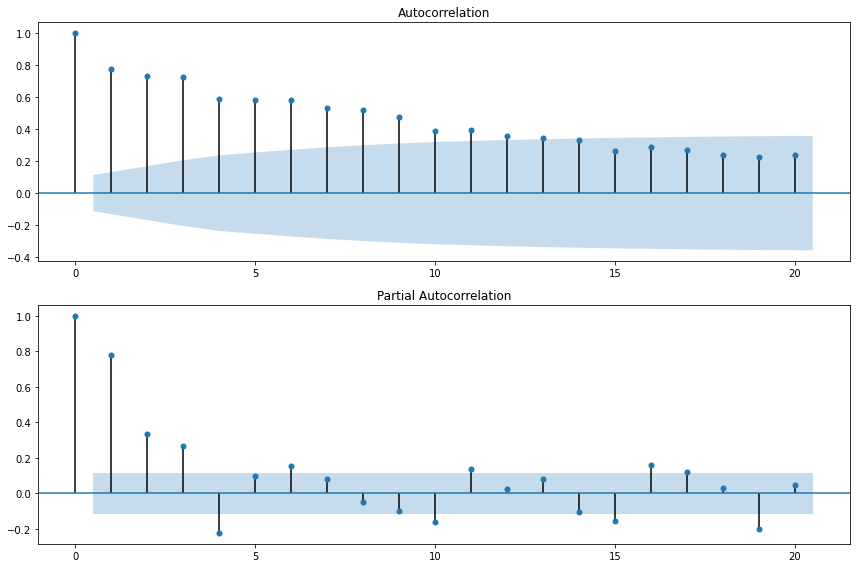

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

#acf   from statsmodels.tsa.stattools import acf, pacf
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(datasetLogDiffShifting_1, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout();

#pacf
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(datasetLogDiffShifting_1, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout();

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting ARIMA model


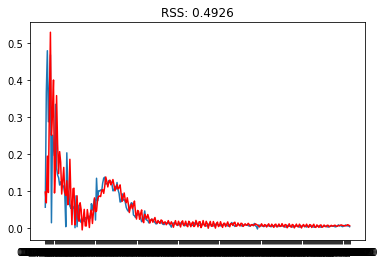

In [ ]:
#Arima starts
model_3 = ARIMA(final_logScale, order=(3,1,3))
results_ARIMA = model_3.fit(disp=-1)
plt.plot(datasetLogDiffShifting_1)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting_1['Deaths'])**2))
print('Plotting ARIMA model')

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff

ObservationDate
01/23/2020    0.097844
01/24/2020    0.068915
01/25/2020    0.195061
01/26/2020    0.096855
01/27/2020    0.326239
                ...   
11/11/2020    0.006790
11/12/2020    0.008058
11/13/2020    0.009968
11/14/2020    0.008748
11/15/2020    0.007014
Length: 298, dtype: float64

In [ ]:
final_logScale

,Deaths
ObservationDate,
01/22/2020,2.833213
01/23/2020,2.890372
01/24/2020,3.258097
01/25/2020,3.737670
01/26/2020,4.025352
...,...
11/11/2020,14.065858
11/12/2020,14.073213
11/13/2020,14.079839


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print(predictions_ARIMA_diff_cumsum)

ObservationDate
01/23/2020     0.097844
01/24/2020     0.166758
01/25/2020     0.361819
01/26/2020     0.458674
01/27/2020     0.784914
                ...    
11/11/2020    11.745441
11/12/2020    11.753499
11/13/2020    11.763467
11/14/2020    11.772215
11/15/2020    11.779228
Length: 298, dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Deaths'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

ObservationDate
01/22/2020    2.833213
01/23/2020    2.931057
01/24/2020    2.999972
01/25/2020    3.195033
01/26/2020    3.291888
dtype: float64

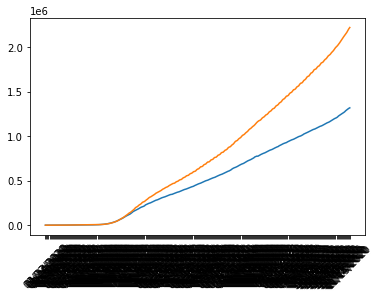

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)

plt.xticks(rotation=45)
plt.plot(final)
plt.plot(predictions_ARIMA)

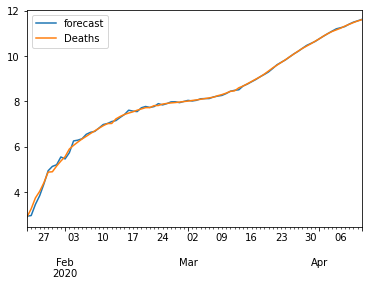

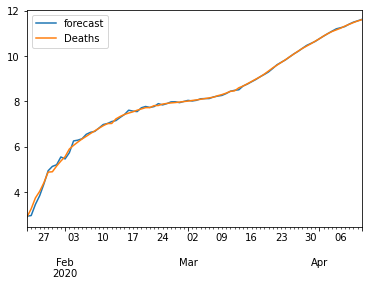

In [ ]:
#Predicting
results_ARIMA.plot_predict(1,80)

In [ ]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Deaths   No. Observations:                  298
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 603.399
Method:                       css-mle   S.D. of innovations              0.031
Date:                Sun, 06 Dec 2020   AIC                          -1190.798
Time:                        17:46:49   BIC                          -1161.221
Sample:                    01-23-2020   HQIC                         -1178.958
                         - 11-15-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0978      0.091      1.076      0.283      -0.080       0.276
ar.L1.D.Deaths     0.1050      0.034      3.072      0.002       0.038       0.172
ar.L2.D.Deaths    -0.1002      0.035     -2.889      0.004      -0.168      -0.032
ar.L3.D.Deaths     0.9792      0.016     62.506      0.000       0.948       1.010
ma.L1.D.Deaths    -0.0058      0.056     -0.103      0.918      -0.115       0.104
ma.L2.D.Deaths     0.6502      0.035     18.690      0.000       0.582       0.718
ma.L3.D.Deaths    -0.5446      0.060     -9.135      0.000      -0.661      -0.428
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0056           -0.0000j            1.0056           -0.0000
AR.2           -0.4516           -0.9009j            1.0078           -0.3240
AR.3           -0.4516           +0.9009j            1.0078            0.3240
MA.1           -0.2893           -0.9759j            1.0178           -0.2959
MA.2           -0.2893           +0.9759j            1.0178            0.2959
MA.3            1.7724           -0.0000j            1.7724           -0.0000
-----------------------------------------------------------------------------
"""